In [ ]:
# 회귀분석

# 회귀는 여러 개의 독립변수와 한 개의 종속변수 간의 상관관계를 모델링하는 기법을 통칭
# 머신러닝 회귀 예측의 핵심은 주어진 피처와 결정 값 데이터 기반에서 학습을 통해 최적의 회귀 계수를 찾아내는 것

# 회귀는 회귀 계수의 선형/비선형 여부, 독립변수의 개수, 종속변수의 개수에 따라 여러 가지 유형으로 나눌 수 있음

# 일반 선형 회귀 : 예측값과 실제값의 RSS를 최소화할 수 있도록 회귀계수를 최적화화며, 규제를 적용하지 않은 모델
# 릿지 : 선형 회귀에 L2 규제 추가
# 라쏘 : 선형 회귀에 L1 규제 적용
# 엘라스틱넷 : L2, L1 규제를 결합한 모델

In [ ]:
# RSS

# 오류 값의 제곱을 구해서 더하는 방식
# 일반적으로 미분 등의 계산을 편리하게 하기 위해서 RSS 방식으로 오류 합을 구함

# 회귀식의 독립변수X, 종속변수 Y가 중심 변수가 아니라 w변수(회귀 계수)가 중심 변수임을 인지

# 비용함수, 손실함수
# 비용최소화 >> 경사하강법

# 다중공선성 문제

In [ ]:
# 회귀평가

# MAE : metrics.mean_absolute_error : 'neg_mean_absolute_error'
# MSE : metrics.mean_squared_error : 'neg_mean_squared_error'
# R제곱 : metrics.r2_socre : 'r2'

### 전쟁충격으로 인한 농산물 가격변화

In [49]:
# 데이터 확인

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore', category=RuntimeWarning)

bike_df = pd.read_csv('./csv/train_bike.csv')

print(bike_df.shape)
bike_df.head(3)

(10886, 12)


,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32


In [50]:
# 데이터 타입, null값 확인

bike_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


In [51]:
# 데이터 타입 변경 삭제

# 문자열을 datetime 타입으로 변경
bike_df['datetime'] = bike_df.datetime.apply(pd.to_datetime)

# # datetime 타입에서 년, 월, 일, 시간 추출1
# bike_df['year'] = pd.DatetimeIndex(bike_df['datetime']).year
# bike_df['month'] = pd.DatetimeIndex(bike_df['datetime']).month
# bike_df['day'] = pd.DatetimeIndex(bike_df['datetime']).day
# bike_df['hour'] = pd.DatetimeIndex(bike_df['datetime']).hour

# # datetime 타입에서 년, 월, 일, 시간 추출2
# bike_df['year'] = bike_df['datetime'].dt.strftime('%Y')
# bike_df['month'] = bike_df['datetime'].dt.strftime('%m')
# bike_df['day'] = bike_df['datetime'].dt.strftime('%d')
# bike_df['hour'] = bike_df['datetime'].dt.strftime('%H')


# datetime 타입에서 년, 월, 일, 시간 추출3
bike_df['year'] = bike_df.datetime.apply(lambda x : x.year)
bike_df['month'] = bike_df.datetime.apply(lambda x : x.month)
bike_df['day'] = bike_df.datetime.apply(lambda x : x.day)
bike_df['hour'] = bike_df.datetime.apply(lambda x : x.hour)

bike_df

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,hour
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3,13,16,2011,1,1,0
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8,32,40,2011,1,1,1
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5,27,32,2011,1,1,2
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3,10,13,2011,1,1,3
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0,1,1,2011,1,1,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10881,2012-12-19 19:00:00,4,0,1,1,15.58,19.695,50,26.0027,7,329,336,2012,12,19,19
10882,2012-12-19 20:00:00,4,0,1,1,14.76,17.425,57,15.0013,10,231,241,2012,12,19,20
10883,2012-12-19 21:00:00,4,0,1,1,13.94,15.910,61,15.0013,4,164,168,2012,12,19,21
10884,2012-12-19 22:00:00,4,0,1,1,13.94,17.425,61,6.0032,12,117,129,2012,12,19,22


In [52]:
# data type 확인후 불필요한 목록 삭제
bike_df.info()

drop_columns = ['datetime', 'casual', 'registered']
bike_df.drop(drop_columns, axis=1, inplace=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   datetime    10886 non-null  datetime64[ns]
 1   season      10886 non-null  int64         
 2   holiday     10886 non-null  int64         
 3   workingday  10886 non-null  int64         
 4   weather     10886 non-null  int64         
 5   temp        10886 non-null  float64       
 6   atemp       10886 non-null  float64       
 7   humidity    10886 non-null  int64         
 8   windspeed   10886 non-null  float64       
 9   casual      10886 non-null  int64         
 10  registered  10886 non-null  int64         
 11  count       10886 non-null  int64         
 12  year        10886 non-null  int64         
 13  month       10886 non-null  int64         
 14  day         10886 non-null  int64         
 15  hour        10886 non-null  int64         
dtypes: datetime64[ns](1), 

In [53]:
# 에러 함수들 정의 후 선형회귀 학습/예측
from sklearn.metrics import mean_absolute_error, mean_squared_error

# log 값 변환 시 NaN등의 이슈로 log()가 아닌 log1p()를 이용하여 RMSLE 계산
def rmsle(y, pred):
    log_y = np.log1p(y)
    log_pred = np.log1p(pred)
    sqaured_error = (log_y - log_pred) **2
    rmsle = np.sqrt(np.mean(sqaured_error))
    return rmsle

# 사이킷런의 mean_square_error()를 이용하여 RMSE 계산
def rmse(y,pred):
    return np.sqrt(mean_squared_error(y, pred))

# MAE, RMSE, RMSLE를 모두 계산
def evaluate_regr(y, pred):
    rmsle_val = rmsle(y, pred)
    rmse_val = rmse(y,pred)
    # MAE는 scikit learn의 mean_absolute_error()로 계산
    mae_val = mean_absolute_error(y, pred)
    print('RMLSE: {0:.3f}, RMSE: {1:.3f}, MAE: {2:.3f}'.format(rmsle_val, rmse_val, mae_val))

In [54]:
# 학습 데이터, 테스트 데이터 분리
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression, Ridge, Lasso

y_target = bike_df['count']
X_features = bike_df.drop(['count'], axis=1, inplace=False)

X_train, X_test, y_train, y_test = train_test_split(X_features, y_target, test_size=0.3, random_state=107)

# 선형회귀 적용 후 학습/예측/평가
lr_reg = LinearRegression()
lr_reg.fit(X_train, y_train)
pred = lr_reg.predict(X_test)

evaluate_regr(y_test, pred)

RMLSE: 1.168, RMSE: 141.468, MAE: 106.975


In [55]:
# 예측값과 실제값 오차 확인
def get_top_error_data(y_test, pred, n_tops = 5):
    # DataFrame에 컬럼들로 실제 대여횟수(count)와 예측값을 서로 비교할 수 있도록 생성
    result_df = pd.DataFrame(y_test.values, columns=['real_count'])
    result_df['predicted_count'] = np.round(pred)
    result_df['diff'] = np.abs(result_df['real_count'] - result_df['predicted_count'])
    # 예측값과 실제값의 차이가 가장 큰 데이터 순으로 출력
    print(result_df.sort_values('diff', ascending=False)[:n_tops])

get_top_error_data(y_test, pred, n_tops=5)

      real_count  predicted_count   diff
489          817            169.0  648.0
1244         834            188.0  646.0
2852         839            202.0  637.0
1923         835            211.0  624.0
1036         943            359.0  584.0


In [56]:
# 타겟값에 로그를 취해서 정규화

# 타겟 컬럼인 count를 log1p로 Log변환
y_target_log = np.log1p(y_target)

# 로그 변환된 y_target_log를 반영하여 학습/테스트 데이터 셋 분할
X_train, X_test, y_train, y_test = train_test_split(X_features, y_target_log, test_size=0.3, random_state=107)
lr_reg = LinearRegression()
lr_reg.fit(X_train, y_train)
pred = lr_reg.predict(X_test)

# 테스트 데이터 셋의 Target 값은 Log 변환되었으므로 다시 exmp1를 이용하여 원래 scale로 변환
y_test_exp = np.expm1(y_test)

# 테스트 데이터 셋의 Target값은 Log 변환되었으므로 다시 expm1를 이용하여 원래 scale로 변환
pred_exp = np.expm1(pred)

evaluate_regr(y_test_exp, pred_exp)

RMLSE: 1.008, RMSE: 160.719, MAE: 107.214


<AxesSubplot:>

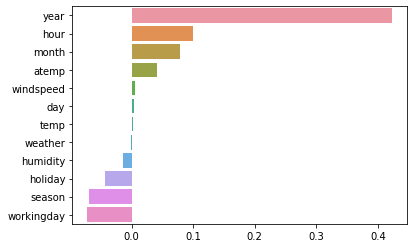

In [57]:
# 피처 별 회귀계수 확인

coef = pd.Series(lr_reg.coef_, index=X_features.columns)
coef_sort = coef.sort_values(ascending=False)
sns.barplot(x=coef_sort.values, y=coef_sort.index)

In [58]:
# 원핫 인코딩 후 다시 학습/예측

# 'year', 'month', 'hour', 'season', 'weather', feature들을 One Hot Encoding
X_features_ohe = pd.get_dummies(X_features, columns=['year', 'month', 'hour', 'holiday', 'workingday', 'season', 'weather'])


In [63]:
# 원핫 인코딩이 적용된 feature 데이터 세트 기반으로 학습/예측 데이터 분할
X_train, X_test, y_train, y_test =\
    train_test_split(X_features_ohe, y_target_log, test_size=0.3, random_state=0)

# 모델과 학습/테스트 데이터 셋을 입력하면 성능 평가 수치를 반환
def get_model_predict(model, X_train, X_test, y_train, y_test, is_expm1=False):
    model.fit(X_train, y_train)
    pred = model.predict(X_test)
    if is_expm1 :
        y_test = np.expm1(y_test)
        pred = np.expm1(pred)
    print('###',model.__class__.__name__,'###')
    evaluate_regr(y_test, pred)
# end of function get_model_predict

# model 별로 평가 수행
lr_reg = LinearRegression()
ridge_reg = Ridge(alpha=10)
lasso_reg = Lasso(alpha=0.01)

for model in [lr_reg, ridge_reg, lasso_reg]:
    get_model_predict(model, X_train, X_test, y_train, y_test, is_expm1=True)

### LinearRegression ###
RMLSE: 0.589, RMSE: 97.485, MAE: 63.106
### Ridge ###
RMLSE: 0.589, RMSE: 98.407, MAE: 63.648
### Lasso ###
RMLSE: 0.634, RMSE: 113.031, MAE: 72.658


<AxesSubplot:>

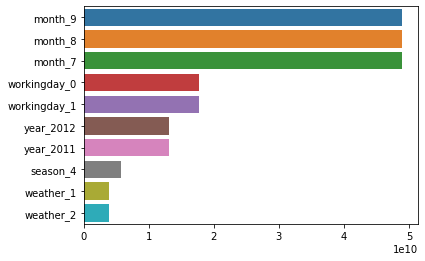

In [65]:
# 원핫 인코딩 후 회귀계수 확인

coef = pd.Series(lr_reg.coef_, index=X_features_ohe.columns)
coef_sort = coef.sort_values(ascending=False)[:10]
sns.barplot(x=coef_sort.values, y=coef_sort.index)

In [66]:
# 회귀 트리 사용

from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

# 랜덤 포레스트, GBM, XGBoost, LightGBM, model 별로 평가 수행
rf_reg = RandomForestRegressor(n_estimators=500)
gbm_reg = GradientBoostingRegressor(n_estimators=500)

for model in [rf_reg, gbm_reg]:
    # XGBoost의 경우 DataFrmae이 입력될 경우 버전에 따라 오류 발생가능. ndarray로 변환
    get_model_predict(model, X_train.values, X_test.values, y_train.values, y_test.values, is_expm1=True)

### RandomForestRegressor ###
RMLSE: 0.354, RMSE: 50.847, MAE: 31.465
### GradientBoostingRegressor ###
RMLSE: 0.341, RMSE: 55.777, MAE: 34.334
